### 상품명으로 상품 분위기 분류하기

In [1]:
import pandas as pd
prd = pd.read_csv('prd_details_fixed.csv')
style = pd.read_csv('prd_style_match.csv')

In [2]:
master = pd.merge(prd, style, on='상품명', how='inner') # 조인
df = master[['상품명', '분위기']] # 사용할 칼럼만 가져오기
df.drop_duplicates(inplace = True) # 중복 제거
df.reset_index(drop='True', inplace=True) # 인덱스 번호 정리

C:\Users\skygg\AppData\Local\Temp/ipykernel_26512/1798900342.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True) # 중복 제거


In [3]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['라벨'] = encoder.fit_transform(df['분위기'])
df

C:\Users\skygg\AppData\Local\Temp/ipykernel_26512/4144996465.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['라벨'] = encoder.fit_transform(df['분위기'])


,상품명,분위기,라벨
0,리버서블 오피스 데스크 책상/테이블 600~2400mm(2colors),러블리&로맨틱,0
1,벤트라이크 멀티플 접이식 세발자전거+안전가드,모미내,1
2,FLENSTED MOBILES 모빌 - 천사 Angel mobile,모미내,1
3,경추목 메모리폼 숙면 꿀잠 수면 베개_항균탠샐,모미내,1
4,리스 클래식 법랑 양수냄비 22cm(H),모미내,1
...,...,...,...
95911,실크스크린 아트포스터 3종 Journey Collection 01-03,유니크&믹스매치,4
95912,HUSVIKA 후스비카 스프링매트리스 603.188.64,유니크&믹스매치,4
95913,악세스시리즈01 한정판 아트포스터,유니크&믹스매치,4
95914,[해외]Sand Rug 01,유니크&믹스매치,4


In [4]:
# 텍스트 전처리
def text_preprocessor(s):
    import re

    pattern = r'\([^)]*\)'  # ()
    s = re.sub(pattern=pattern, repl='', string=s)
    
    pattern = r'\[[^)]*\]'  # []
    s = re.sub(pattern=pattern, repl='', string=s)
    
    pattern = r'[^a-zA-Z가-힣]'
    s = re.sub(pattern=pattern, repl=' ', string=s)

    
    pattern = r'[0-9]+' # 숫자제거
    s = re.sub(pattern=pattern, repl='', string=s)
    
    
    stop_words = ['mm', 'cm', 'km', 'ml', 'kg', 'g', 'colors', 'color', 'size', '개', '인테리어', 'type', '세트', 'ss', 'set']
    for s_w in stop_words:
        s = s.lower() # 대문자를 소문자로 변환
        s = s.replace(s_w, '')

    return s

In [5]:
df['상품명'] = df['상품명'].apply(text_preprocessor)

C:\Users\skygg\AppData\Local\Temp/ipykernel_26512/4135473516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['상품명'] = df['상품명'].apply(text_preprocessor)


In [6]:
df

,상품명,분위기,라벨
0,리버서블 오피스 데스크 책상 테이블,러블리&로맨틱,0
1,벤트라이크 멀티플 접이식 세발자전거 안전가드,모미내,1
2,flensted mobiles 모빌 천사 anel mobile,모미내,1
3,경추목 메모리폼 숙면 꿀잠 수면 베 항균탠샐,모미내,1
4,리스 클래식 법랑 양수냄비,모미내,1
...,...,...,...
95911,실크스크린 아트포스터 종 journey collection,유니크&믹스매치,4
95912,husvika 후스비카 스프링매트리스,유니크&믹스매치,4
95913,악세스시리즈 한정판 아트포스터,유니크&믹스매치,4
95914,sand ru,유니크&믹스매치,4


In [7]:
prd_name = list(df['상품명'])
label = list(df['라벨'])

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(prd_name)
y = np.array(label)

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np

from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(x, y, test_size =0.2, random_state = 42)

In [10]:
# word_count = pd.DataFrame({
#     '단어':vectorizer.get_feature_names_out(),
#     '가중치': x.sum(axis=0).flat
# })

# word_count.sort_values('가중치', ascending=False)

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() 
model.fit(x_train, y_train)

C:\Users\skygg\anaconda3\envs\nlp_test\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
print("Accuracy: {}".format(model.score(x_test, y_test)))

Accuracy: 0.6459028356964137


모미내가 전체 데이터에서 64%정도를 차지한다. 이 정도면 모미내만 맞추고 나머지는...

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
# 문서 단어 행렬
cv = CountVectorizer()
dtm = cv.fit_transform (prd_name)

In [14]:
word_count = pd.DataFrame({
    '단어':cv.get_feature_names_out(),
    '빈도': dtm.sum(axis=0).flat
})

word_count.sort_values('빈도', ascending=False)

,단어,빈도
58547,화이트,3280
42773,원목,2967
52521,테이블,2198
42148,우드,2074
43055,원형,1723
...,...,...
26633,미디어정리함,1
26637,미디엄블루,1
26638,미디엄소프트,1
26639,미디엄워머,1


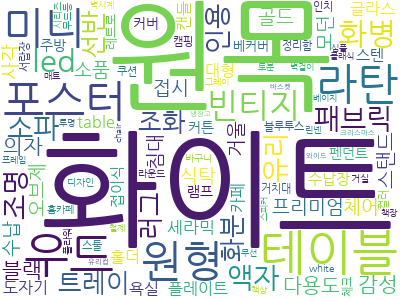

In [18]:
from wordcloud import WordCloud
count_dic = dict(zip(word_count.단어, word_count.빈도))
wc = WordCloud(font_path='NanumGothic.ttf',
  background_color='white',    # 배경색
  max_words=100,               # 시각화할 단어 개수,
  width=400,                   # 가로 크기
  height=300)                  # 세로 크기
cloud = wc.fit_words(count_dic)
cloud.to_image() 